# a)

In [8]:
import gymnasium as gym
import matplotlib.pyplot as plt
import time 
import numpy as np
from IPython.display import clear_output

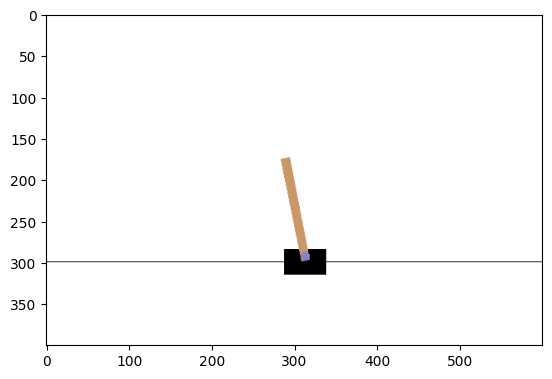

Step 0: observation = [ 0.00233012  0.23430538  0.00988412 -0.30254716], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 1: observation = [ 0.00701623  0.42928508  0.00383318 -0.59209657], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 2: observation = [ 0.01560193  0.6243532  -0.00800875 -0.88356954], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 3: observation = [ 0.028089    0.42934087 -0.02568014 -0.5934151 ], action = 0, reward = 1.0, terminated = False, truncated = False, info ={}
Step 4: observation = [ 0.03667581  0.6248127  -0.03754844 -0.8940753 ], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 5: observation = [ 0.04917207  0.43021953 -0.05542995 -0.6134279 ], action = 0, reward = 1.0, terminated = False, truncated = False, info ={}
Step 6: observation = [ 0.05777646  0.23591422 -0.06769851 -0.3387056 ], action = 0, reward = 1.0, terminated = False,

In [9]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
observation, info = env.reset()

episode_over = False
i = 0
observations = []
frames = []
actions = []
rewards = []
terminateds = []
truncateds = []
infos = []
while not episode_over:
    i += 1
    frame = env.render()
    frames.append(frame)
    action = env.action_space.sample()  # random action sampling
    observation, reward, terminated, truncated, info = env.step(action)
    observations.append(observation)
    actions.append(action)
    rewards.append(reward)
    terminateds.append(terminated)
    truncateds.append(truncated)
    infos.append(info)
    episode_over = terminated or truncated

for frame in frames:
    plt.imshow(frame)
    clear_output(wait=True)
    plt.show()
    time.sleep(0.01)
env.close()

for j in range(i):
    print(f"Step {j}: observation = {observations[j]}, action = {actions[j]}, reward = {rewards[j]}, terminated = {terminateds[j]}, truncated = {truncateds[j]}, info ={infos[j]}")

# b)

In [10]:
def simple_policy(observ): 
    cart_pos = observ[0]
    cart_vel = observ[1]
    tilt_angle = observ[2]
    tilt_angle_vel = observ[3]

    if tilt_angle < 0: 
        return 0 # push cart to the left 
    else: 
        return 1 # push cart to the right

def advanced_policy(observ):
    cart_pos = observ[0]
    cart_vel = observ[1]
    tilt_angle = observ[2]
    tilt_angle_vel = observ[3]

    if tilt_angle < 0 and tilt_angle_vel < 1: # push cart to the left  because angle  < 0 and vel not too big
        return 0 
    elif tilt_angle < 0 and tilt_angle_vel > 1: # push cart to the right because vel too big
        return 1
    elif tilt_angle > 0 and tilt_angle_vel > -1: # push cart to the right because angle > 0 and negative vel not too big 
        return 1
    elif tilt_angle > 0 and tilt_angle_vel < -1: # push cart to the left because neg. vel too big
        return 0 # push cart to the left

def run_and_vis_episode(display= False, policy= "S"):
    env = gym.make("CartPole-v1", render_mode="rgb_array")
    observation, info = env.reset()
    episode_over = False
    i = 0
    if display == True:
        observations = []
        frames = []
        actions = []
        rewards = []
        terminateds = []
        truncateds = []
        infos = []
        observation, _ = env.reset()
        while not episode_over:
            i += 1
            frame = env.render()
            frames.append(frame)
            if policy == "S":
                action = simple_policy(observation)    # policy defined through function 
            else:
                action = advanced_policy(observation)    # policy defined through function 
            observation, reward, terminated, truncated, info = env.step(action)
            observations.append(observation)
            actions.append(action)
            rewards.append(reward)
            terminateds.append(terminated)
            truncateds.append(truncated)
            infos.append(info)
            episode_over = terminated or truncated
        for frame in frames:
            plt.imshow(frame)
            clear_output(wait=True)
            plt.show()
            #time.sleep(0.01)
        env.close()

        for j in range(i):
            print(f"Step {j}: observation = {observations[j]}, action = {actions[j]}, reward = {rewards[j]}, terminated = {terminateds[j]}, truncated = {truncateds[j]}, info ={infos[j]}")
    else:
        while not episode_over:
            i += 1
            if policy == "S":
                action = simple_policy(observation)    # policy defined through function 
            else:
                action = advanced_policy(observation)    # policy defined through function 
            observation, reward, terminated, truncated, info = env.step(action)
            episode_over = terminated or truncated
    
    return i

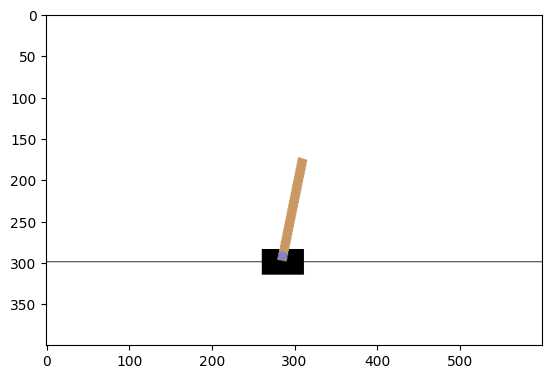

Step 0: observation = [ 0.02157748  0.23684055  0.03094091 -0.25840658], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 1: observation = [ 0.02631429  0.4315074   0.02577278 -0.54117197], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 2: observation = [ 0.03494444  0.62625784  0.01494934 -0.82562417], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 3: observation = [ 0.0474696   0.8211722  -0.00156314 -1.1135681 ], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 4: observation = [ 0.06389304  0.6260708  -0.0238345  -0.8213759 ], action = 0, reward = 1.0, terminated = False, truncated = False, info ={}
Step 5: observation = [ 0.07641446  0.4312829  -0.04026202 -0.5362838 ], action = 0, reward = 1.0, terminated = False, truncated = False, info ={}
Step 6: observation = [ 0.08504011  0.23674953 -0.05098769 -0.25655404], action = 0, reward = 1.0, terminated = False,

In [11]:
iterations = run_and_vis_episode(display=True, policy="S")
print(iterations)

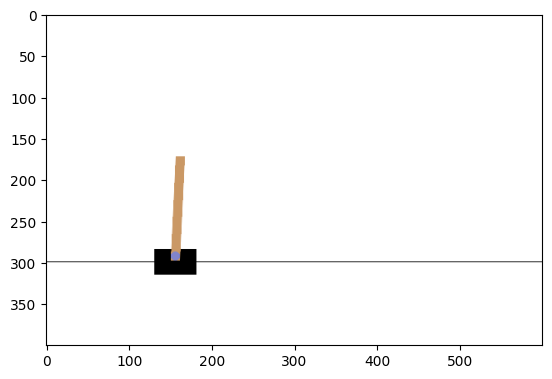

Step 0: observation = [-0.03263381 -0.21827596 -0.03133573  0.27510184], action = 0, reward = 1.0, terminated = False, truncated = False, info ={}
Step 1: observation = [-0.03699933 -0.41293713 -0.02583369  0.5577391 ], action = 0, reward = 1.0, terminated = False, truncated = False, info ={}
Step 2: observation = [-0.04525807 -0.6076871  -0.01467891  0.84217227], action = 0, reward = 1.0, terminated = False, truncated = False, info ={}
Step 3: observation = [-0.05741181 -0.8026056   0.00216454  1.1302031 ], action = 0, reward = 1.0, terminated = False, truncated = False, info ={}
Step 4: observation = [-0.07346392 -0.6075121   0.0247686   0.8381999 ], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 5: observation = [-0.08561417 -0.41273698  0.0415326   0.553408  ], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 6: observation = [-0.09386891 -0.21822213  0.05260076  0.27409443], action = 1, reward = 1.0, terminated = False,

In [13]:
iterations = run_and_vis_episode(display=True, policy="A")
print(iterations)

In [14]:
m = 200
sum_s = 0
sum_a = 0
for i in range(m):
    sum_s += run_and_vis_episode(display=False, policy="S")
    sum_a += run_and_vis_episode(display=False, policy="A")
sum_s = sum_s/m
sum_a = sum_a/m
print(f"The averaged reward over {m} episodes of the simple policy is= {sum_s}")
print(f"The averaged reward over {m} episodes of the advanced policy is= {sum_a}")

The averaged reward over 200 episodes of the simple policy is= 42.185
The averaged reward over 200 episodes of the advanced policy is= 499.5
